In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,matthews_corrcoef



In [2]:
df = pd.read_csv('../Feature Engineering/EPL_Final_cleaned_features_v2.csv')
df.tail(10)

,Temperature,Humidity,WindDirection,Precipitation,WindSpeed,Home_Prv_FTHG,Home_Prv_HS,Home_Prv_HST,Home_Prv_HF,Home_Prv_HC,...,WeatherCode_Clear,WeatherCode_Clouds,WeatherCode_Drizzle,WeatherCode_Fog,WeatherCode_Haze,WeatherCode_Mist,WeatherCode_Rain,WeatherCode_Snow,Time_of_Day_Afternoon,Time_of_Day_Evening
1062,2.344227,-2.204040,-0.589810,-0.362486,-0.379553,-1.042081,-0.148348,-0.846471,-0.715569,1.065042,...,0,1,0,0,0,0,0,0,1,0
1063,2.395202,-2.402411,0.391359,-0.362486,-0.191917,1.363757,1.196101,1.154890,-0.715569,-1.059757,...,1,0,0,0,0,0,0,0,1,0
1064,1.084958,-0.881566,-0.371772,-0.362486,-0.751215,-0.240135,0.811972,0.754618,-0.715569,-1.413890,...,1,0,0,0,0,0,0,0,1,0
1065,1.394584,-0.021959,-0.295459,0.464234,-0.711523,-0.240135,-0.340412,0.354346,2.548645,0.356776,...,0,0,0,0,0,0,1,0,1,0
1066,2.408418,-2.468534,0.391359,-0.362486,-0.191917,-0.240135,1.580229,1.154890,0.644520,0.356776,...,1,0,0,0,0,0,0,0,1,0
1067,2.287588,-2.666905,-0.262754,-0.362486,-0.191917,0.561811,-0.916604,0.354346,0.644520,0.002643,...,1,0,0,0,0,0,0,0,1,0
1068,1.498421,-0.881566,0.271438,-0.362486,-0.076449,-0.240135,-1.876925,-1.246744,-0.987587,-1.768023,...,0,1,0,0,0,0,0,0,1,0
1069,1.202012,-0.220330,0.391359,0.170882,0.363773,0.561811,2.348485,0.354346,-1.259605,1.419176,...,0,0,0,0,0,0,1,0,1,0
1070,1.717425,-0.749319,0.282340,-0.362486,0.176137,0.561811,3.692933,1.555162,-1.531623,1.419176,...,0,1,0,0,0,0,0,0,1,0
1071,1.405911,-1.741174,-0.371772,-0.362486,-0.191917,-0.240135,-0.148348,-0.846471,-0.171534,-0.705624,...,0,1,0,0,0,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                1072 non-null   float64
 1   Humidity                   1072 non-null   float64
 2   WindDirection              1072 non-null   float64
 3   Precipitation              1072 non-null   float64
 4   WindSpeed                  1072 non-null   float64
 5   Home_Prv_FTHG              1072 non-null   float64
 6   Home_Prv_HS                1072 non-null   float64
 7   Home_Prv_HST               1072 non-null   float64
 8   Home_Prv_HF                1072 non-null   float64
 9   Home_Prv_HC                1072 non-null   float64
 10  Home_Prv_HY                1072 non-null   float64
 11  Home_Prv_HR                1072 non-null   float64
 12  Away_Prv_FTAG              1072 non-null   float64
 13  Away_Prv_AS                1072 non-null   float

In [3]:
train_data = df[df['season'].isin(['2019-2020', '2020-2021'])]
test_data = df[df['season'] == '2021-2022']

In [5]:
test_data[['FTR','Date', 'Time', 'season']].tail(20)

,FTR,Date,Time,season
1052,0,2022-05-15,14:00,2021-2022
1053,0,2022-05-15,14:00,2021-2022
1054,0,2022-05-15,16:30,2021-2022
1055,0,2022-05-15,14:00,2021-2022
1056,1,2022-05-15,12:00,2021-2022
1057,1,2022-05-16,20:00,2021-2022
1058,0,2022-05-17,19:45,2021-2022
1059,1,2022-05-19,19:45,2021-2022
1060,0,2022-05-19,20:00,2021-2022
1061,0,2022-05-19,20:00,2021-2022


### Model with Weather Data:

In [19]:
# Splitting into features and target variable
X_train = train_data.drop(columns=['FTR','Date', 'Time', 'season','HomeTeam','AwayTeam'])
y_train = train_data['FTR']
X_test = test_data.drop(columns=['FTR','Date', 'Time', 'season','HomeTeam','AwayTeam'])
y_test = test_data['FTR']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((722, 51), (722,), (350, 51), (350,))

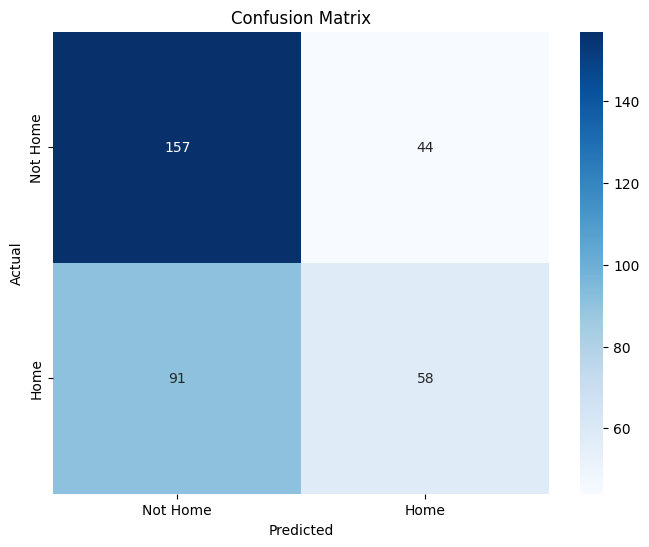

{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}
MCC: 0.18536313461848689
accuracy: 0.6142857142857143
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       201
           1       0.57      0.39      0.46       149

    accuracy                           0.61       350
   macro avg       0.60      0.59      0.58       350
weighted avg       0.61      0.61      0.60       350



In [23]:
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear','lbfgs'],
    'tol': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_iter':[10000]
}

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Using GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearch
best_params1 = grid_search.best_params_

# Building the Logistic Regression model with the best parameters
model = LogisticRegression(**best_params1)
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Home', 'Home'], yticklabels=['Not Home', 'Home'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(best_params1)
print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)

In [24]:
pd.DataFrame(y_pred,columns=['LR_y_pred']).to_csv('1.LR_y_pred_with_weather.csv')

In [10]:
df_pred_prob = pd.DataFrame(model.predict_proba(X_test)[:,1], columns= ['Y_Pred_Prob_LR'])
df_pred_prob['Y_Pred_Prob_LR'] = round(df_pred_prob['Y_Pred_Prob_LR'],2)
df_pred_prob.to_csv('1.LR_Y_Pred_Prob.csv', index= False)

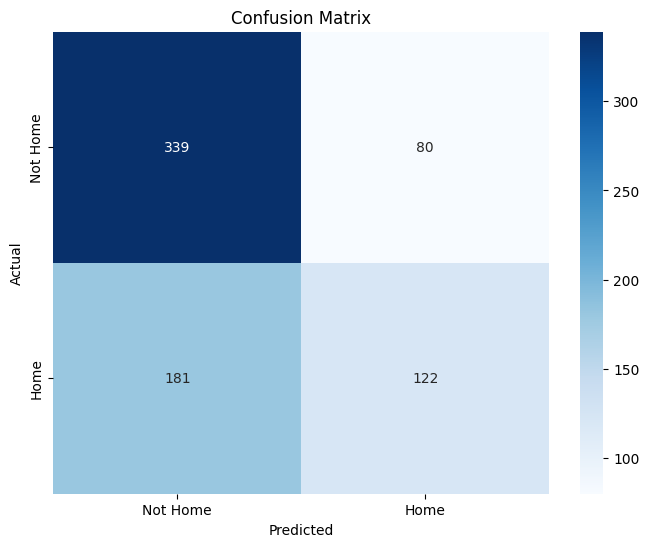

{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}
MCC: 0.2327508455189493
accuracy: 0.6385041551246537
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       419
           1       0.60      0.40      0.48       303

    accuracy                           0.64       722
   macro avg       0.63      0.61      0.60       722
weighted avg       0.63      0.64      0.62       722



In [11]:
# Predicting on the TRAIN data
y_pred_train = model.predict(X_train)

# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_train, y_pred_train)
accuracy = accuracy_score(y_train, y_pred_train)
classification_report_output = classification_report(y_train, y_pred_train)

cm = confusion_matrix(y_train, y_pred_train)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Home', 'Home'], yticklabels=['Not Home', 'Home'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(best_params1)
print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)

### Model without Weather Data:

In [4]:
# Splitting into features and target variable
X_train = train_data.drop(columns=['FTR','Date', 'Time', 'season','HomeTeam','AwayTeam','Temperature', 'Humidity', 'WindDirection', 'Precipitation', 'WindSpeed', 
                                   'WeatherCode_Clear', 'WeatherCode_Clouds', 'WeatherCode_Drizzle', 'WeatherCode_Fog', 'WeatherCode_Haze', 'WeatherCode_Mist', 'WeatherCode_Rain', 'WeatherCode_Snow'])
y_train = train_data['FTR']
X_test = test_data.drop(columns=['FTR','Date', 'Time', 'season','HomeTeam','AwayTeam','Temperature', 'Humidity', 'WindDirection', 'Precipitation', 'WindSpeed', 
                                   'WeatherCode_Clear', 'WeatherCode_Clouds', 'WeatherCode_Drizzle', 'WeatherCode_Fog', 'WeatherCode_Haze', 'WeatherCode_Mist', 'WeatherCode_Rain', 'WeatherCode_Snow'])
y_test = test_data['FTR']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((722, 38), (722,), (350, 38), (350,))

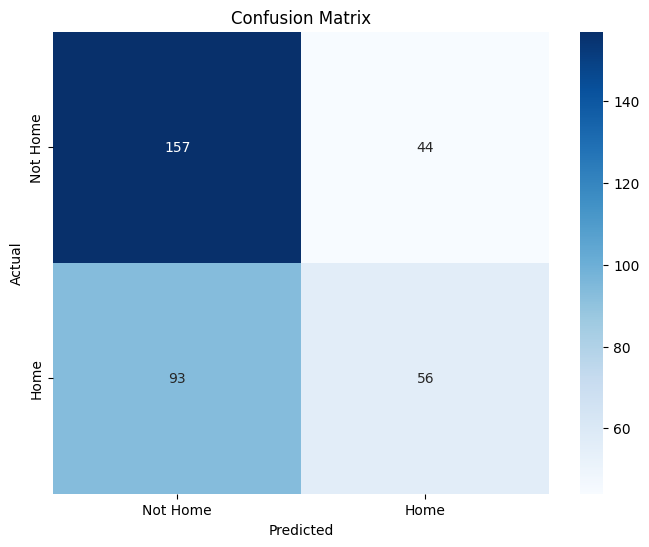

{'C': 10, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}
MCC: 0.17176579771620418
accuracy: 0.6085714285714285
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       201
           1       0.56      0.38      0.45       149

    accuracy                           0.61       350
   macro avg       0.59      0.58      0.57       350
weighted avg       0.60      0.61      0.59       350



In [5]:
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear','lbfgs'],
    'tol': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_iter':[10000]
}

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Using GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearch
best_params = grid_search.best_params_

# Building the Logistic Regression model with the best parameters
model = LogisticRegression(**best_params)
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Home', 'Home'], yticklabels=['Not Home', 'Home'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(best_params)
print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)

In [6]:
pd.DataFrame(y_pred,columns=['LR_y_pred']).to_csv('1.LR_y_pred_without_weather.csv')

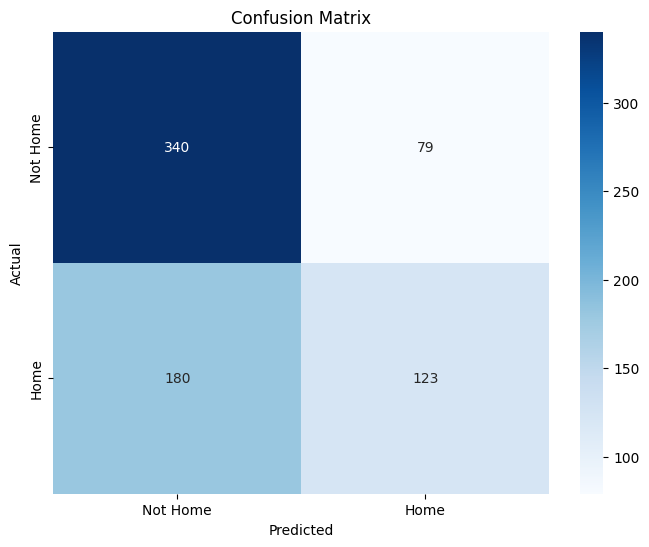

{'C': 10, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}
MCC: 0.23900302613003205
accuracy: 0.6412742382271468
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       419
           1       0.61      0.41      0.49       303

    accuracy                           0.64       722
   macro avg       0.63      0.61      0.61       722
weighted avg       0.63      0.64      0.62       722



In [7]:
# Predicting on the TRAIN data
y_pred_train = model.predict(X_train)

# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_train, y_pred_train)
accuracy = accuracy_score(y_train, y_pred_train)
classification_report_output = classification_report(y_train, y_pred_train)

cm = confusion_matrix(y_train, y_pred_train)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Home', 'Home'], yticklabels=['Not Home', 'Home'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(best_params)
print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)